In [13]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from numpy import diff

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of yr
M_solar = 1.989e30


# Definition of the binary system 
m_bar = 1

D_luminosity = 5e8              # The distance to the system from earth as 500 Mpc



ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))



# Dark matter spike with alpha=9/4 for Primordial black holes case
r_spike = 1  # in parsecs, Choosen by choice

alpha = 9/4

rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  # This takes the value of M_sun/pc^3 and converts it to 1/pc^2

spike = imripy.halo.Spike(rho_spike, r_spike, alpha)



m_1 = 1e-3   #in units of M☉
m_2 = 2*m_1   #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy  = (y_2 - y_1)

print("dy=",dy)

y_list = np.zeros(20)
m_1_list = np.zeros(len(y_list))
m_2_list = np.zeros(len(y_list))

for i in range(len(y_list)):
    m_1_list[i] = m_2_list[i] = (m_1 + ((i/4)*np.exp(dy)))

Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, m_1 in enumerate(m_1_list):
    Δ_1_list[i] =  Δ_2_list[i] = np.exp(m_1 + 0.5*dy) - np.exp(m_1 - 0.5*dy)
     

    

    
def a(m_1,m_2,Δ_1,Δ_2):
    
    f_pbh = 4.3e-3
    f = 0.85 * f_pbh
        
          
    def P(m): #Powerlaw PBH mass distribution
        α = 2.6
        M = 1e-4     #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return ( 0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_1 = a(m_1_list[2], m_2_list[0], Δ_1_list[2], Δ_2_list[0])




dy= 0.6931471805599454


In [14]:
m_1 = 1e-4   #in units of M☉
m_2 = 2*m_1   #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy  = (y_2 - y_1)

print("dy=",dy)

y_list = np.zeros(20)
m_1_list = np.zeros(len(y_list))
m_2_list = np.zeros(len(y_list))


for i in range(len(y_list)):
    m_1_list[i] = m_2_list[i] = (m_1 + ((i/4)*np.exp(dy)))
    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, m_1 in enumerate(m_1_list):
    Δ_1_list[i] =  Δ_2_list[i] = np.exp(m_1 + 0.5*dy) - np.exp(m_1 - 0.5*dy)
     
a_2 = a(m_1_list[2], m_2_list[0], Δ_1_list[2], Δ_2_list[0])


 

dy= 0.6931471805599436


In [15]:
m_1 = 10   #in units of M☉
m_2 = 100   #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(10)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i/2)*dy)
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))-1
    M_2_list[i] = (np.ceil(np.exp(y)))-1
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    


a_3 = a(m_1_list[0], m_2_list[8], Δ_1_list[0], Δ_2_list[8])

Evolving from  1.5995686318045546e+16  to  100000.0 r_isco  with initial eccentricity 0.99999  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in sqrt
  retur

A termination event occurred.
 -> Evolution took 1.9105s
Evolving from  408089321326120.8  to  100000.0 r_isco  with initial eccentricity 0.999  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 


A termination event occurred.
 -> Evolution took 1.9619s
Evolving from  4348546015286002.0  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi *np.sqrt(sp.m_total(a) * a*(1.-e**2)) *  quad(integrand, 0., 2.*np.pi, limit = 100)

Required step size is less than spacing between numbers.
 -> Evolution took 1.0886s


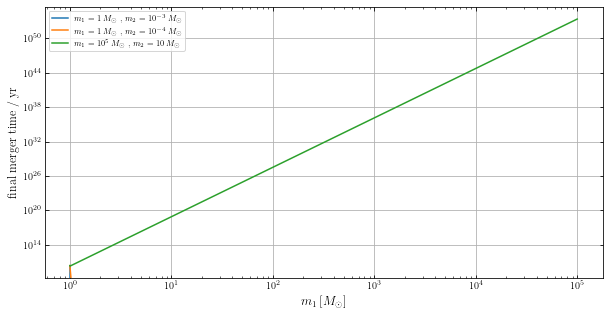

In [26]:
e0_array = 1- np.geomspace(1e-5, 0.1, 3) 

e0_list = e0_array.tolist()            

a0_list = [1e5*a_1, 1e7*a_2, 1e-8*a_3]

m1_list = [1,1,1e5]

m2_list = [1e-3,1e-4,1e5]


a_fin = sp.r_isco()      # Choosen equal to r_icso

R_fin = sp.r_isco()      # The final condition for the evolution


plt.figure(figsize = (10, 5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

t_m_list = np.zeros(len(e0_list))
j_i_list = np.zeros(len(e0_list))

colors = ['C0','C1','C2','C3', 'C4','C5']


for i, (m1, m2, a0, e0, color) in enumerate (zip(m1_list, m2_list, a0_list, e0_list, colors)):
    m1= m1* ms.solar_mass_to_pc
    m2= m2*  ms.solar_mass_to_pc
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a0 = a0_list[i]  
    e_0 = e0_list[i] 
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e_0,  a_fin = R_fin)
    t_m_list[i] = ev_ecc.t[-1]/ms.year_to_pc
    plt.loglog(m1_list, t_m_list, color=color)
    

    
    
plt.legend(["$m_{1} = 1 \, M_{\odot}$ , $m_{2}= 10^{-3} \, M_{\odot}$ ","$m_{1} = 1 \, M_{\odot}$ , $m_{2}= 10^{-4} \, M_{\odot}$ ","$m_{1} = 10^{5} \, M_{\odot}$ , $m_{2}= 10 \, M_{\odot}$ " ],
            title_fontsize = 12, loc = 'upper left', prop = {"size":8})
plt.xlabel('$m_{1} \, [M_{\odot}]$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('')
plt.grid()
plt.savefig('t_m vs m1.pdf', bbox_inches='tight')
plt.show()

Evolving from  1.5995686318045546e+16  to  100000.0 r_isco  with initial eccentricity 0.99999  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in sqrt
  retur

A termination event occurred.
 -> Evolution took 1.9459s
Evolving from  408089321326120.8  to  100000.0 r_isco  with initial eccentricity 0.999  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 


A termination event occurred.
 -> Evolution took 1.9513s
Evolving from  4348546015286002.0  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi *np.sqrt(sp.m_total(a) * a*(1.-e**2)) *  quad(integrand, 0., 2.*np.pi, limit = 100)

Required step size is less than spacing between numbers.
 -> Evolution took 1.0954s


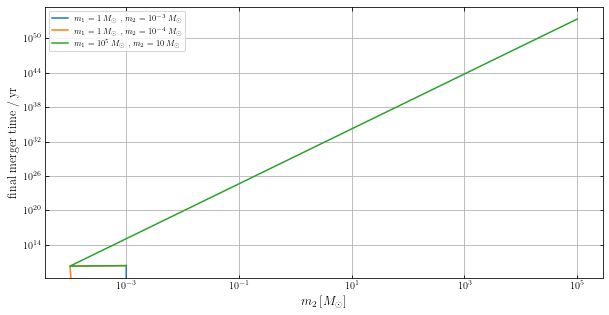

In [27]:
e0_array = 1- np.geomspace(1e-5, 0.1, 3) 

e0_list = e0_array.tolist()            

a0_list = [1e5*a_1, 1e7*a_2, 1e-8*a_3]

m1_list = [1,1,1e5]

m2_list = [1e-3,1e-4,1e5]


a_fin = sp.r_isco()      # Choosen equal to r_icso

R_fin = sp.r_isco()      # The final condition for the evolution


plt.figure(figsize = (10, 5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

t_m_list = np.zeros(len(e0_list))
j_i_list = np.zeros(len(e0_list))

colors = ['C0','C1','C2','C3', 'C4','C5']


for i, (m1, m2, a0, e0, color) in enumerate (zip(m1_list, m2_list, a0_list, e0_list, colors)):
    m1= m1* ms.solar_mass_to_pc
    m2= m2*  ms.solar_mass_to_pc
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a0 = a0_list[i]  
    e_0 = e0_list[i] 
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e_0,  a_fin = R_fin)
    t_m_list[i] = ev_ecc.t[-1]/ms.year_to_pc
    plt.loglog(m2_list, t_m_list, color=color)
    

    
    
plt.legend(["$m_{1} = 1 \, M_{\odot}$ , $m_{2}= 10^{-3} \, M_{\odot}$ ","$m_{1} = 1 \, M_{\odot}$ , $m_{2}= 10^{-4} \, M_{\odot}$ ","$m_{1} = 10^{5} \, M_{\odot}$ , $m_{2}= 10 \, M_{\odot}$ " ],
            title_fontsize = 12, loc = 'upper left', prop = {"size":8})
plt.xlabel('$m_{2}\, [M_{\odot}]$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('')
plt.grid()
plt.savefig('t_m vs m2.pdf', bbox_inches='tight')
plt.show()